<a href="https://colab.research.google.com/github/dalip98/New-York-City-Taxi-Trip-Duration-Kaggle-/blob/master/NewYork_City_Taxi_Trip_Duration_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Authenticating With Google Drive


In [0]:
!pip install -U -q pyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
#authenticate
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Importing Dependencies.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Loading the Datasets from Google Drive

In [0]:
train_downloaded = drive.CreateFile({'id':'1zBZDF5jcG2PtUVisT33sihl2u0CEJClc'})
train_downloaded.GetContentFile('train.csv')
test_downloaded = drive.CreateFile({'id':'1OsLQL-95ZuISVkgvsW5h0WxEv3LzcsVK'})
test_downloaded.GetContentFile('test.csv')

In [0]:
df_train=pd.read_csv('train.csv')
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435


In [0]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988,40.732,-73.990,40.757,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964,40.680,-73.960,40.655,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997,40.738,-73.986,40.730,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956,40.772,-73.986,40.730,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970,40.761,-73.962,40.756,N


# Getting Information about the features

In [0]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000
mean,1.535,1.665,-73.973,40.751,-73.973,40.752,959.492
std,0.499,1.314,0.071,0.033,0.071,0.036,5237.432
min,1.000,0.000,-121.933,34.360,-121.933,32.181,1.000
25%,1.000,1.000,-73.992,40.737,-73.991,40.736,397.000
50%,2.000,1.000,-73.982,40.754,-73.980,40.755,662.000
75%,2.000,2.000,-73.967,40.768,-73.963,40.770,1075.000
max,2.000,9.000,-61.336,51.881,-61.336,43.921,3526282.000


In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


# Filtering out the Outliers in our dataset (Data Cleaning)

In [0]:
m=np.mean(df_train['trip_duration'])
s= np.std(df_train['trip_duration'])
df_train=df_train[df_train['trip_duration']<=m+2*s]
df_train=df_train[df_train['trip_duration']>=m-2*s]

In [0]:
df_train = df_train[df_train['pickup_longitude']<=-73.75]
df_train = df_train[df_train['pickup_longitude']>=-74.03]
df_train = df_train[df_train['pickup_latitude']<=40.85]
df_train = df_train[df_train['pickup_latitude']>=40.63]
df_train = df_train[df_train['dropoff_longitude']<=-73.75]
df_train = df_train[df_train['dropoff_longitude']>=-74.03]
df_train = df_train[df_train['dropoff_latitude']<=40.85]
df_train = df_train[df_train['dropoff_latitude']>=40.63]


# Preprocessing

In [0]:
df_train['pickup_datetime']=pd.to_datetime(df_train.pickup_datetime)
df_test['pickup_datetime']=pd.to_datetime(df_test.pickup_datetime)
df_train.loc[:,'pickup_date'] = df_train['pickup_datetime'].dt.date
df_test.loc[:,'pickup_date'] = df_test['pickup_datetime'].dt.date
df_train['dropoff_datetime']=pd.to_datetime(df_train.dropoff_datetime)

# Getting idea for the dataset

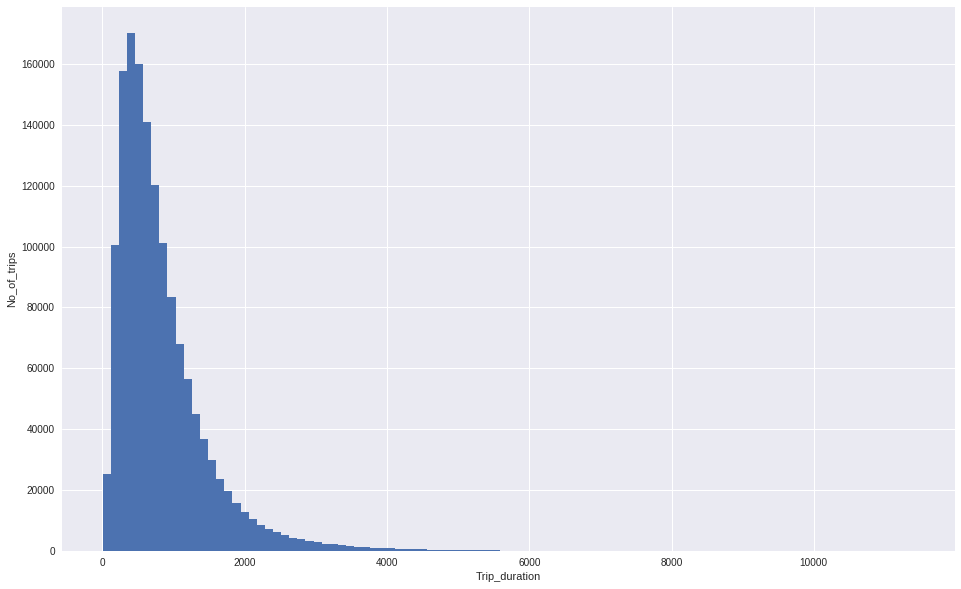

In [0]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.hist(df_train['trip_duration'].values,bins=100)
plt.xlabel('Trip_duration')
plt.ylabel('No_of_trips')
plt.show()


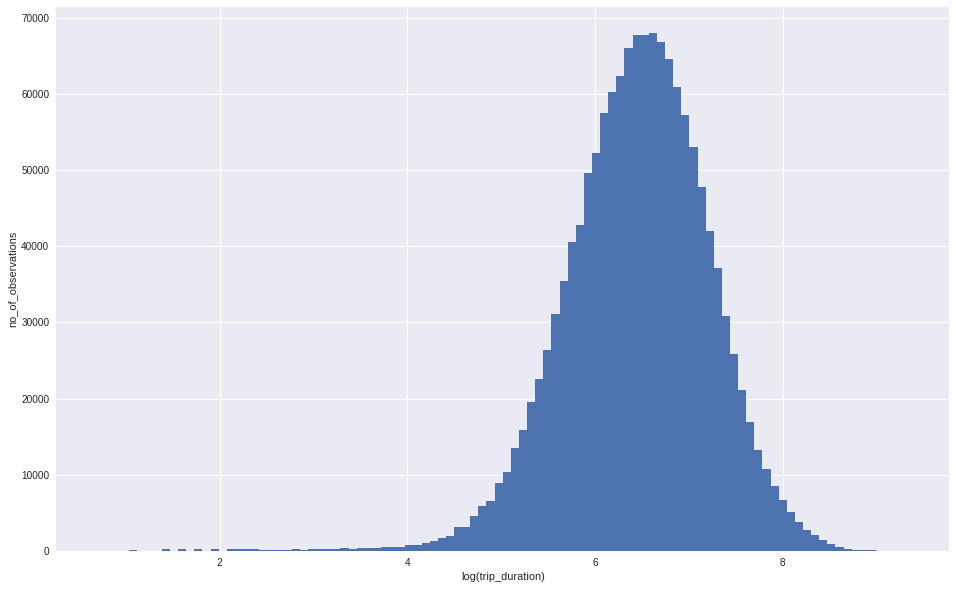

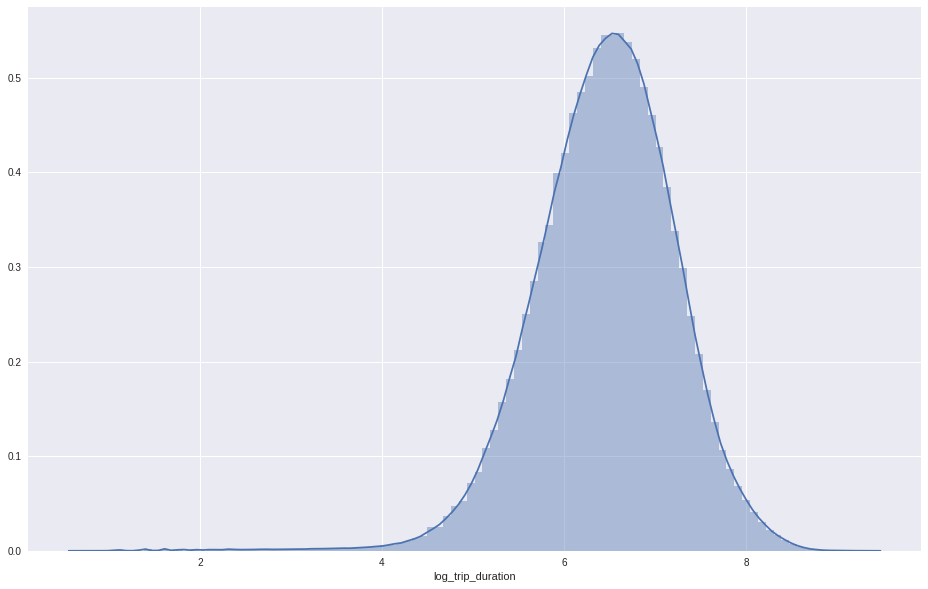

In [0]:
df_train['log_trip_duration']=np.log(df_train['trip_duration'].values+1)
plt.hist(df_train['log_trip_duration'].values , bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('no_of_observations')
plt.show()
sns.distplot(df_train['log_trip_duration'],bins=100)

# Comparing and visualising training and test data

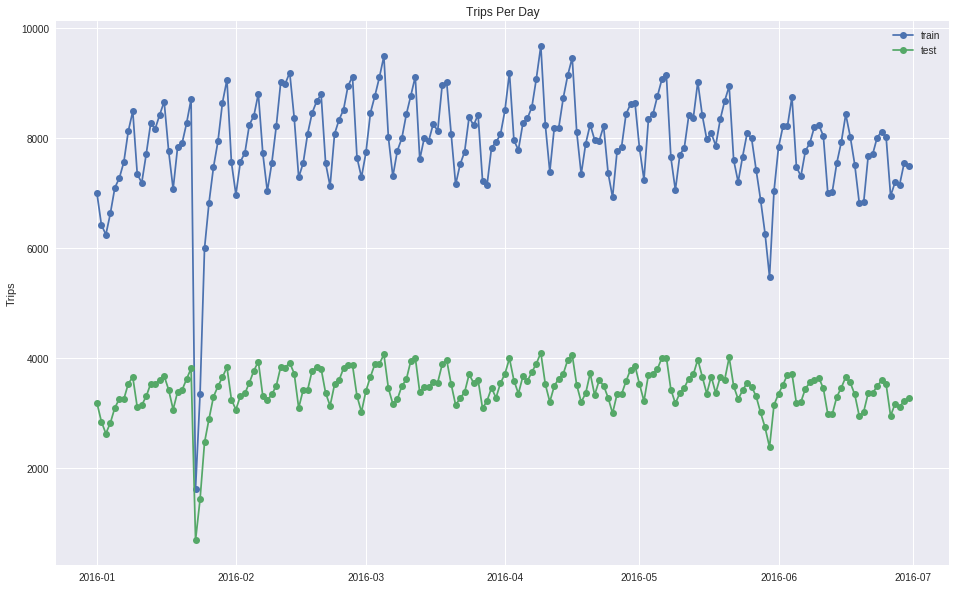

In [0]:
plt.plot(df_train.groupby('pickup_date').count()[['id']], '-o',label = 'train')
plt.plot(df_test.groupby('pickup_date').count()[['id']] , '-o' ,label = 'test')
plt.title('Trips Per Day')
plt.legend(loc=1)
plt.ylabel('Trips')
plt.show()

vendor_id
1   818.627
2   829.484
Name: trip_duration, dtype: float64


Text(0, 0.5, 'Time in Seconds')

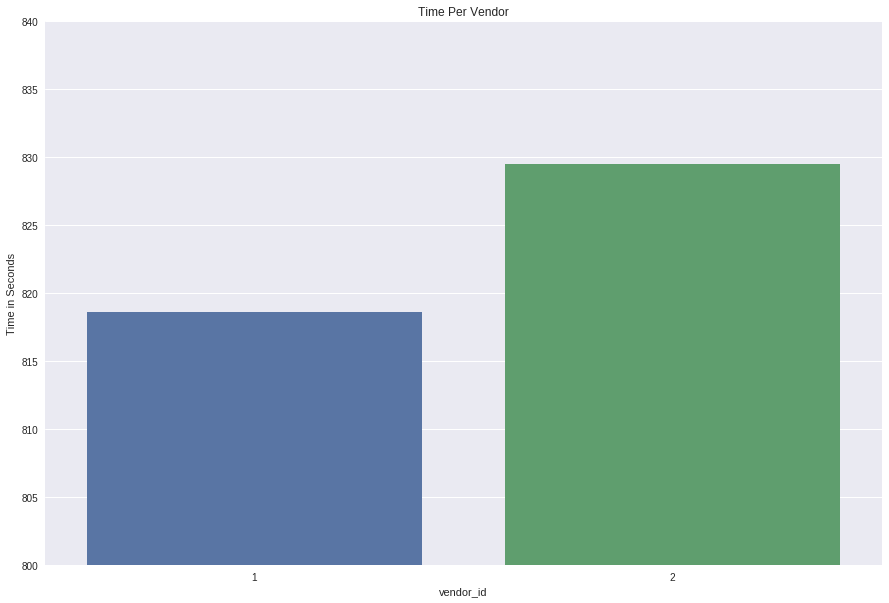

In [0]:
import warnings
warnings.filterwarnings('ignore')
plot_vendor=df_train.groupby('vendor_id')['trip_duration'].mean()
print(plot_vendor)
plt.subplots(1,1,figsize=(15,10))
plt.ylim(ymin=800)
plt.ylim(ymax = 840)
sns.barplot(plot_vendor.index,plot_vendor.values)
plt.title('Time Per Vendor')
#plt.legend(loc=1)
plt.ylabel('Time in Seconds')

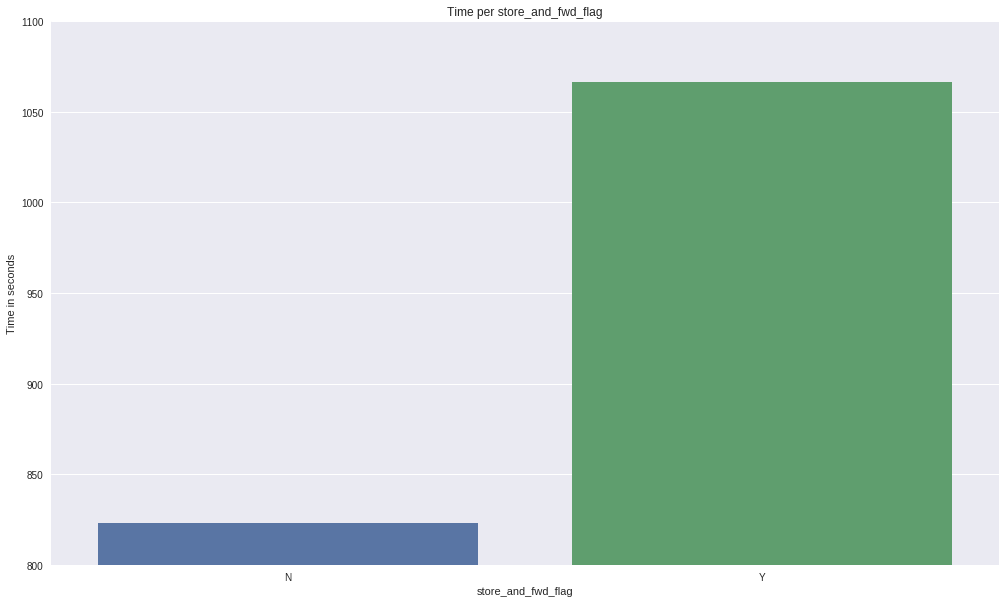

In [0]:
snwflag=df_train.groupby('store_and_fwd_flag')['trip_duration'].mean()
plt.subplots(1,1,figsize=(17,10))
plt.ylim(ymin=800)
plt.ylim(ymax=1100)
plt.title('Time per store_and_fwd_flag')
plt.ylabel('Time in seconds')
sns.barplot(snwflag.index,snwflag.values)

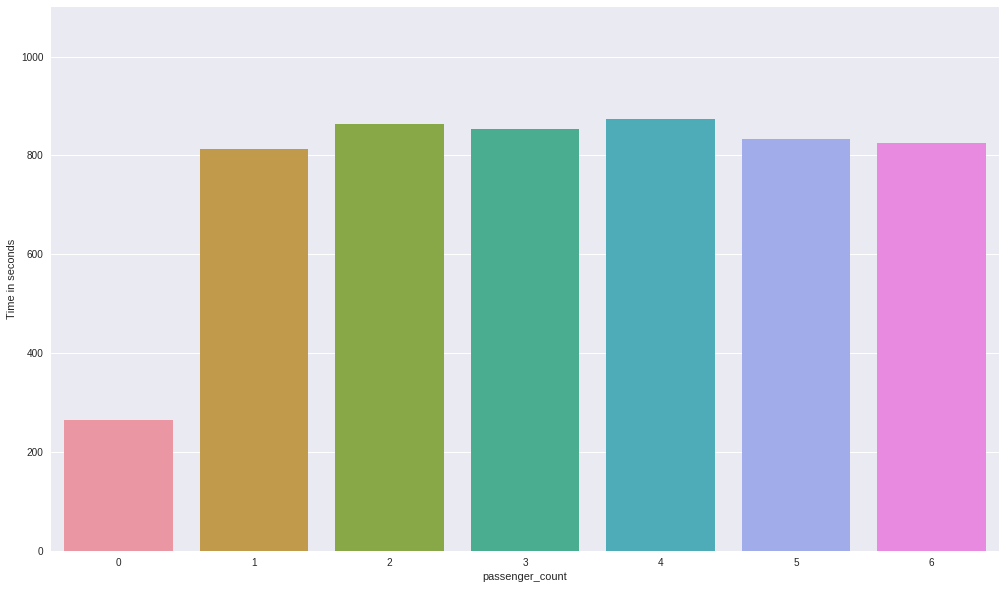

In [0]:
pc = df_train.groupby('passenger_count')['trip_duration'].mean()
plt.subplots(1,1,figsize=(17,10))
plt.ylabel('Time in seconds')

plt.ylim(ymax = 1100)
sns.barplot(pc.index,pc.values)

In [0]:
df_train.groupby('passenger_count').size()

passenger_count
0         52
1    1018715
2     206864
3      58989
4      27957
5      76912
6      47639
dtype: int64

In [0]:
df_test.groupby('passenger_count').size()

passenger_count
0        23
1    443447
2     90027
3     25686
4     12017
5     33411
6     20521
9         2
dtype: int64